# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://github.com/UBC-CS/cpsc330-2021W2/tree/main/lectures) 

**Due date: Monday Jan 24, 2022 at 11:59pm**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are allowed to work and submit in pairs in this homework assignment. 

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index. **Note:** you may need to change the name of the file if it does not match the download.

In [2]:
spotify_df = pd.read_csv("data.csv")
spotify_df = spotify_df.rename(columns={"Unnamed: 0": "index"})
spotify_df.head()

,index,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Excluding the target, how many columns (potential features) does the dataset include?

## Excluding Index, song_title, artist we would say we have 13 Features

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)
print(df_train)
print(df_test)

      index  acousticness  danceability  duration_ms  energy  \
260     260      0.018100         0.932       192773   0.819   
1286   1286      0.083900         0.459       256933   0.561   
1344   1344      0.001920         0.482       198947   0.968   
1197   1197      0.039000         0.673       229507   0.758   
119     119      0.024400         0.746       222093   0.873   
...     ...           ...           ...          ...     ...   
1833   1833      0.003880         0.492       186867   0.797   
799     799      0.062500         0.758       252333   0.629   
124     124      0.674000         0.462       226333   0.449   
538     538      0.000183         0.596       178800   0.628   
1012   1012      0.134000         0.603       246685   0.640   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
260           0.000007    8    0.0577    -3.484     0       0.2030  119.941   
1286          0.000000    7    0.0998    -7.091     1       0.0271  144.7

## Our Training Set has 1613 rows / Examples and our Test has 404 Rows

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the largest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [4]:
print(df_train.describe())

             index  acousticness  danceability   duration_ms       energy  \
count  1613.000000   1613.000000   1613.000000  1.613000e+03  1613.000000   
mean    998.950403      0.185067      0.620076  2.462533e+05     0.681315   
std     579.996434      0.255838      0.161152  8.056740e+04     0.206964   
min       1.000000      0.000003      0.148000  1.604200e+04     0.015600   
25%     494.000000      0.010000      0.514000  1.999040e+05     0.564000   
50%     995.000000      0.062600      0.634000  2.298590e+05     0.712000   
75%    1500.000000      0.260000      0.739000  2.703330e+05     0.841000   
max    2016.000000      0.994000      0.984000  1.004627e+06     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1613.000000  1613.000000  1613.000000  1613.000000  1613.000000   
mean           0.134317     5.384377     0.191317    -7.095272     0.619343   
std            0.274217     3.653722     0.156071     3.678993     0.

## answer Duration_MS would provide the higest range at a spread of 988585 ms

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of the loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

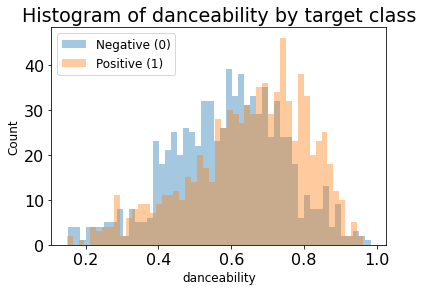

<Figure size 720x720 with 0 Axes>

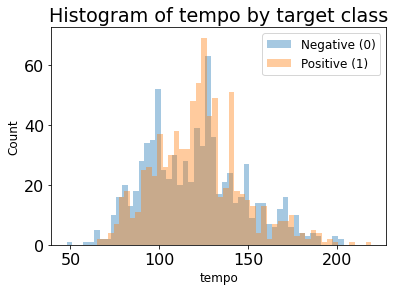

<Figure size 720x720 with 0 Axes>

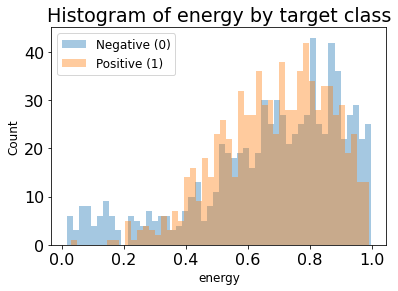

<Figure size 720x720 with 0 Axes>

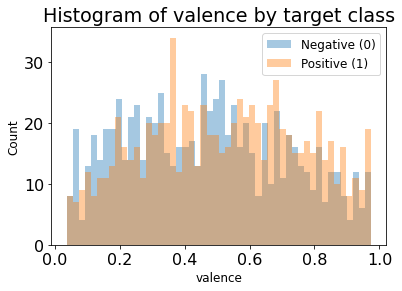

<Figure size 720x720 with 0 Axes>

In [5]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

features = ["danceability","tempo","energy","valence"]
for feature in features:
    plt.hist(negative_examples[[feature]], bins=50, label="Negative Target", alpha=0.4)
    plt.hist(positive_examples[[feature]], bins=50, label="Negative Target", alpha=0.4)
    plt.legend(["Negative (0)","Positive (1)"], fontsize=12)
    plt.xlabel(feature, fontsize=12)  
    plt.ylabel("Count", fontsize=12)
    plt.title("Histogram of "+feature+" by target class")
    plt.figure(figsize=(10,10))
    plt.show()


#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

## We would want to split by danceability at 0.65 it seems that  songs less than 0.65 dancibility are more disliked (more levels of blue on left side) versus above 0.65 where there are more positive liked values.
# Predict 0 if danceability < 0.65 and (predict 1 otherwise)

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



## If the features are identical it would not give us any useful information since equal proportion of people like and dislike the song despite its feature

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [6]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

## They could be useful by categorically sorting them IF there was a dataset that had multiple entries based on the last say 50,000 users listed. But because our data set contains unique songs there is only one entry each so we would not be able to get much information from it. But because artists can appear multiple times, we could predict the percentage of songs that were labeled as positive / liked per artist. The difficulty with using it in our model is that with only ~2000 data points some artist may only have 1 song which would not be very accurate.

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [7]:
df_train.drop(["song_title","artist","index"], axis=1, inplace=True)
df_test.drop(["song_title","artist","index"], axis=1, inplace=True)
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
X_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9987600743955363

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the tenth example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the tenth example with `X_train.iloc[[9]]`.

In [8]:
result = model.predict(X_train.iloc[[9]])
y_train.iloc[[9]]
print(result)

[1]


## Our 10th Example yields the result 1, our model predicts that our song will be 1 which is correct

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [9]:
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
cv_scores

array([0.71604938, 0.66666667, 0.66666667, 0.73913043, 0.7515528 ,
       0.60869565, 0.7515528 , 0.73913043, 0.65217391, 0.68944099])

#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [10]:
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.010913,0.001984,0.703704,0.999311
1,0.010416,0.001488,0.641975,0.998622
2,0.009919,0.000993,0.685185,0.999311
3,0.009919,0.001489,0.714286,0.998623
4,0.009919,0.000993,0.726708,0.998623
5,0.009919,0.001488,0.590062,0.998623
6,0.008928,0.000992,0.701863,0.998623
7,0.009424,0.000993,0.720497,0.999311
8,0.009423,0.001489,0.658385,0.999311
9,0.010416,0.000992,0.670807,0.998623


## The scores will not be exactly the same as, everytime we run it we will be slicing and generating a new set of 10 folds combinations

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

## Yes our training score was close to 1 where as on average our cross validation score was closer to 0.7. This could have been because we did not set any max_depth meaning that all the train_score values were fitted to the end of the tree and does not make a accurate result for generalization. 

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

In [11]:
mean_scores = pd.DataFrame(scores).mean()
mean_scores

fit_time       0.009920
score_time     0.001290
test_score     0.681347
train_score    0.998898
dtype: float64

## Our mean test score was 0.68 percent while our train_score was 0.99 we may be over fitting our data and our model may not be representitive of the population. We are most likely over fitting our data without hyperparameterizations 

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

## SOURCE:Templated from https://ubc-cs.github.io/cpsc330/lectures/03_ml-fundamentals.html 

<function matplotlib.pyplot.legend(*args, **kwargs)>

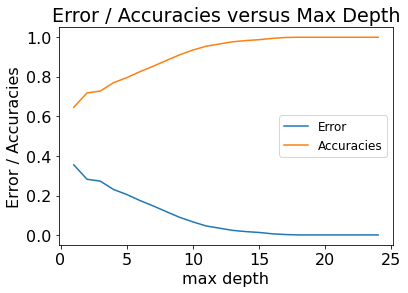

In [12]:
max_depths = np.arange(1, 25)
errors = []
accuracies = []
for max_depth in max_depths:
    error = 1 - DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train).score(
        X_train, y_train)
    errors.append(error)
    accuracy = (
        DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train).score(X_train, y_train))
    accuracies.append(accuracy)
    
plt.plot(max_depths, errors)
plt.plot(max_depths, accuracies)
plt.xlabel("max depth")
plt.ylabel("Error / Accuracies")
plt.title("Error / Accuracies versus Max Depth")
plt.legend(["Error","Accuracies"], fontsize=12)
plt.legend

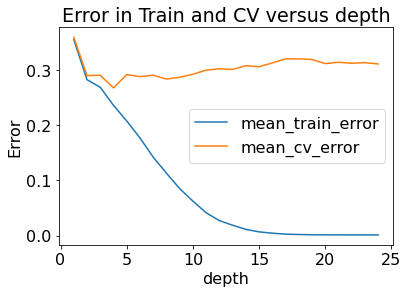

In [13]:
results_dict = {
    "depth": [],
    "mean_train_error": [],
    "mean_cv_error": [],
}
param_grid = {"max_depth": np.arange(1, 25)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_error"].append(1 - np.mean(scores["test_score"]))
    results_dict["mean_train_error"].append(1 - np.mean(scores["train_score"]))

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
results_df[["mean_train_error", "mean_cv_error"]].plot(ylabel = "Error", title = "Error in Train and CV versus depth");

## Changing Max Depth eventually leads to overfitting of data which may not provide good generalization for our data. We eventually get diminishing return on our accuracy and although our mean train error will drop to 0, if we introduce data that it has not seen before it can lead to incorrect classification. For this reason we pick depth of 4 right at the inflection point in which error begins to sharply decrease.

## The depth choosen should result in good generalization due to the fact that our error remains relatively low, but the decision only goes down 4 branches which is much less specific than asking for all the features.

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [14]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.693069306930693


## Our test score is similar to our test score in the previous exercise, here our test score would be similar to our training score which indicate that this model would generalize well to new data.

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\-1\\-1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

## 1. We would end up predicting false (-1) with the data given at the first split being the first feature, it appears that if the first feature is low / under 9 our target would indicate -1
## 2. The training accuracy would be around 75% this is because just based on the first feature it would correctly predict 5 4 2 as they are all under 5.5 but it would not correctly predict 10.
## 3. In a very specific case yes, our first split could be on the first feature asking if first feature == 9 then +1 , else -1.

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 